# **Project Name** - Spotify_Dataset_Analysis_EDA_Project

Project Type - EDA

Contribution - Individual

Name - Aishwarya Kande

## **Project Summary** -

1. To analyze the Spotify tracks dataset to gain insights into various aspects such as genre distribution, track popularity, duration, explicit content, and the relationship between different variables. This analysis can help in understanding trends and making data-driven decisions in the music industry.

2. First, we cleaned and preprocessed the data, which involved checking and removing missing values, handling duplicates. Then we visualized the data using various graphical techniques.

3. Through our analysis, we discovered several interesting insights. For example, we found that Certain artists and genres dominate in terms of the number of tracks and total popularity, providing insights into popular music trends.

#### **GitHub Link -**

# **Problem Statement** -

  In the competitive music streaming industry, platforms like Spotify must continuously optimize their content offerings to attract and retain listeners. Understanding trends in track popularity, genre preferences, and listener behavior is crucial for strategic decision-making. This analysis aims to uncover insights from a dataset of Spotify tracks to guide content curation, marketing strategies, and user engagement initiatives.

####**Define your business objective ?**

Business Objective


The primary business objective of analyzing the Spotify tracks dataset is to enhance the platform's content curation and user engagement strategies by leveraging data-driven insights. This analysis aims to identify trends and patterns in listener preferences, track popularity, genre distribution, and explicit content. By understanding these factors, Spotify can optimize its music library, improve user satisfaction, and ultimately increase its market share in the competitive music streaming industry.

**Objectives**

**Identify Popular Music Trends:**

Analyze track popularity across various genres to determine which genres and artists are most popular.

**Understand Track Duration Preferences:**

Investigate the preferred duration range for tracks and its correlation with popularity.

**Assess Explicit Content Distribution:**

 Examine the prevalence of explicit content in different genres and its impact on track popularity.

**Evaluate Artist Dominance:**

Identify artists with the most tracks and analyze their contribution to overall popularity.

**Develop Recommendations:**

 Provide actionable insights and recommendations based on the analysis to improve content curation and user experience on the platform.

**Key Questions**

Which genres are most popular among Spotify listeners?

What is the relationship between track duration and popularity?

How prevalent is explicit content, and does it affect track popularity differently across genres?

Which artists have the most tracks in the dataset, and how does their popularity compare to others?

What strategies can Spotify implement to enhance its music library and user satisfaction based on these insights?

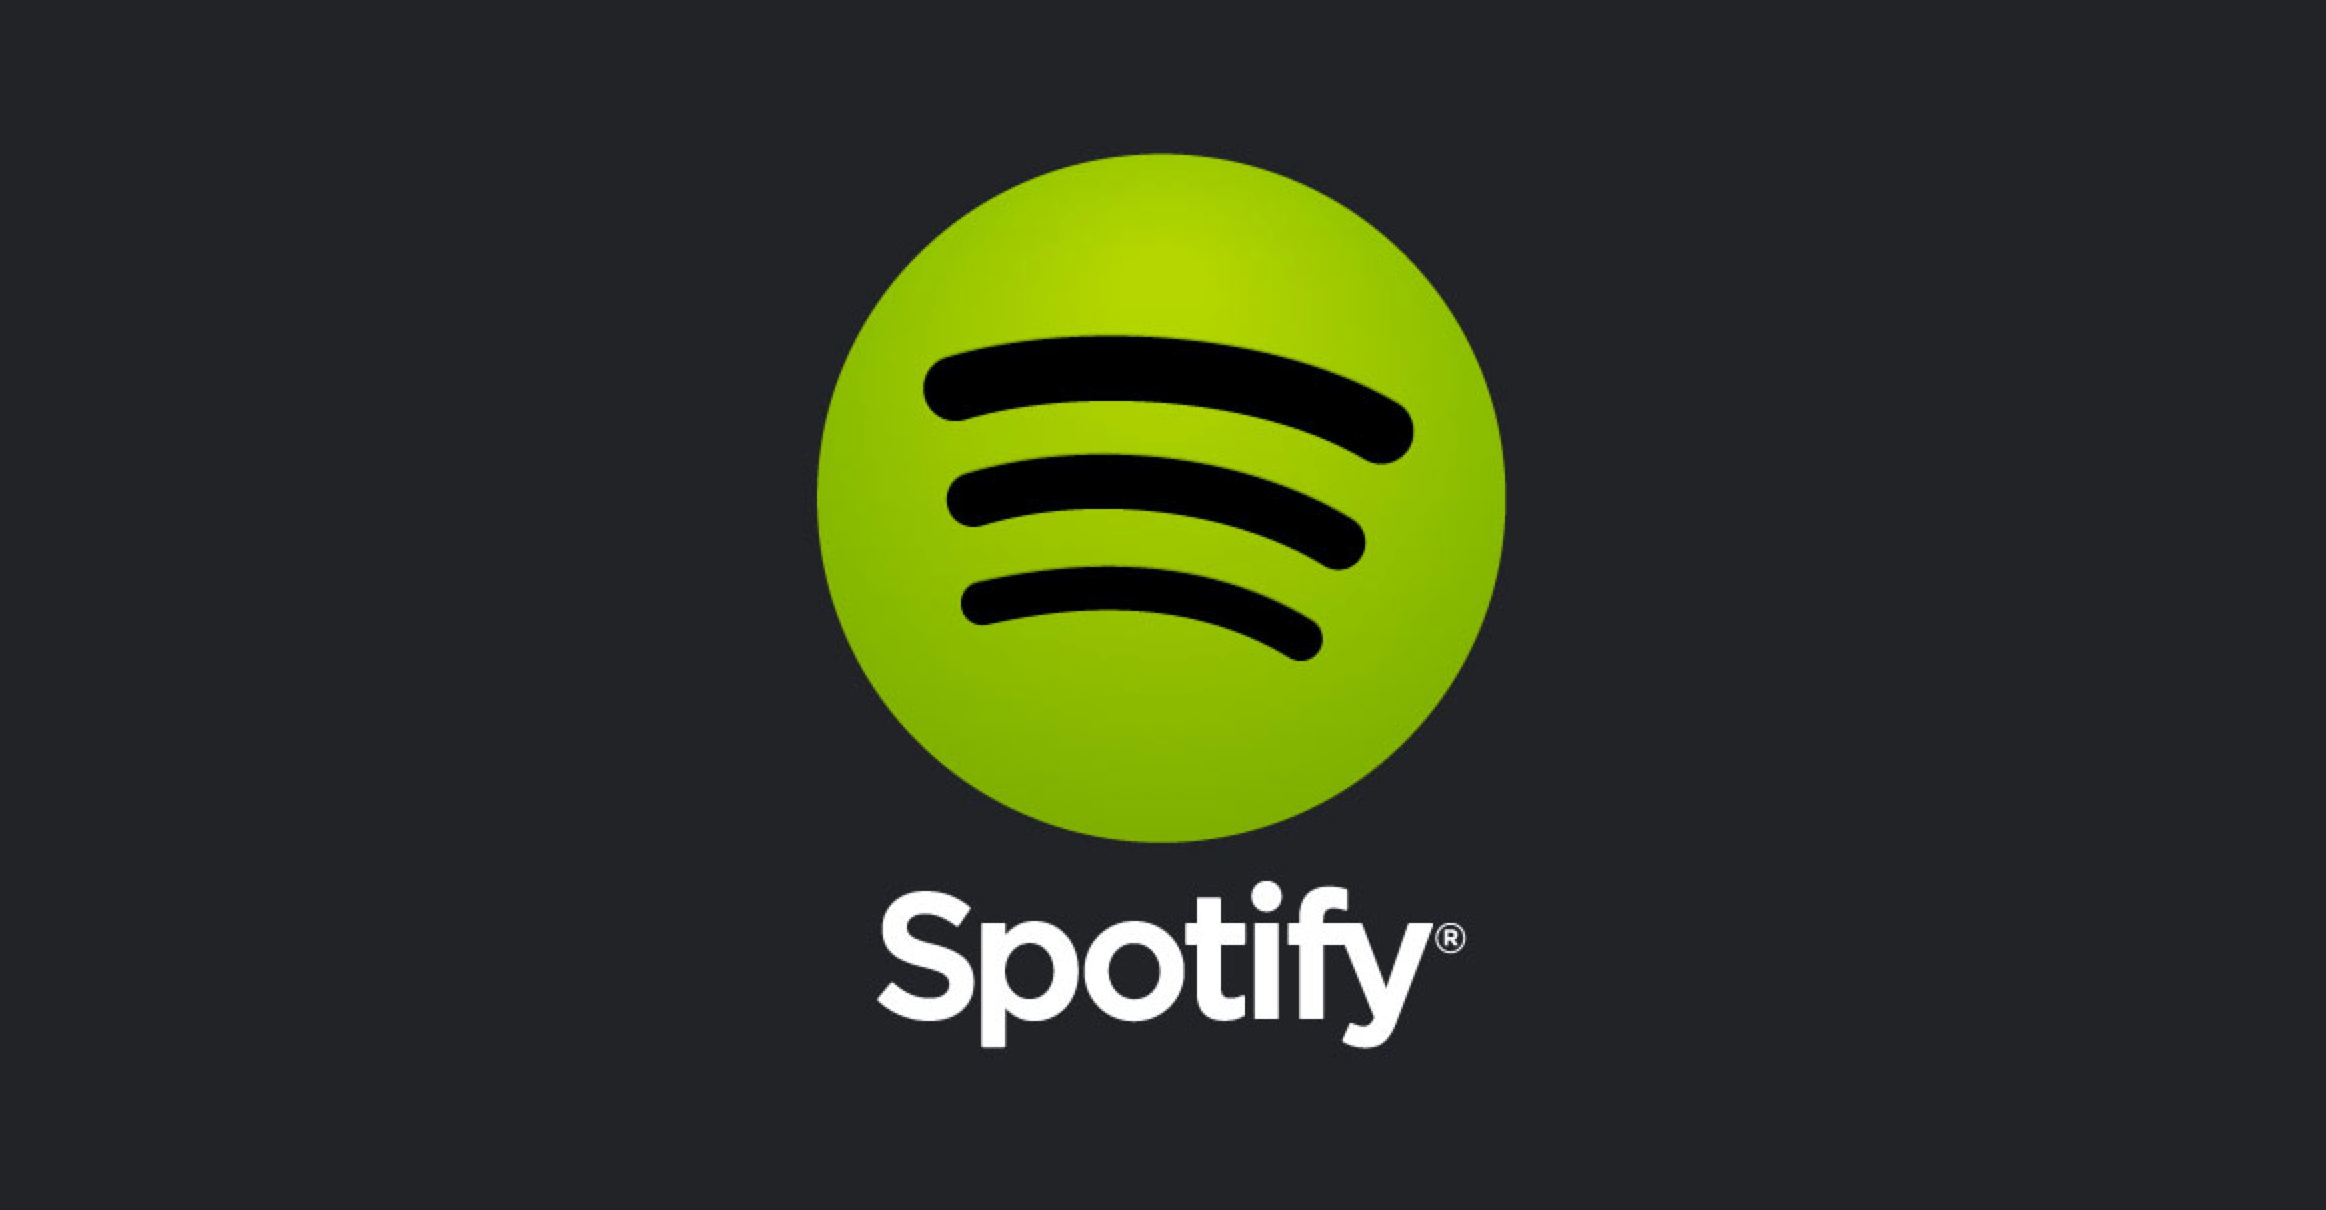

## **1. Know Your Data**

**Import Libraries**


In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Dataset Loading

In [22]:
#Loading dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Load Dataset
Spotify_dataset_path="/content/drive/MyDrive/spotify_tracks.csv"
Spotify_df = pd.read_csv(Spotify_dataset_path)

In [24]:
# Dataset First View
Spotify_df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [25]:
Spotify_df.tail()

,id,name,genre,artists,album,popularity,duration_ms,explicit
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False
6299,3ry0f8ybk8upUBIk8unvmF,Fiore d'inverno,world-music,"Putumayo, Giacomo Lariccia",World Party 5 by Putumayo,25,141800,False


## Dataset Rows & Columns count

In [26]:
Spotify_df.shape

(6300, 8)

## Dataset Info

In [27]:
Spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


# Data Cleaning

Duplicate Values

In [28]:
# Dataset Duplicate Value Count
# checking for the duplicate rows
Spotify_df.duplicated().value_counts()   #true means duplicate rows

False    6300
Name: count, dtype: int64

Missing Values/Null Values

In [29]:
# Missing Values/Null Values Count
Spotify_df.isnull().sum().sort_values(ascending=False)

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

####What did you know about your dataset?

The dataset has no missing values and no duplicate rows. This simplifies our cleaning process significantly.



## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns
Spotify_df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

In [31]:
# Dataset Describe
Spotify_df.describe()

,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


## **Data Description:**

**Id**: Unique identifier for the track

**name**: Name of the track

**genre**: Genre of the track

**artists**: Artists of the track

**album**: Album the track belongs to

**popularity**: Popularity score of the track

**duration_ms**: Duration of the track in milliseconds

**explicit**: Whether the track has explicit content

In [32]:
# Check Unique Values for each variable.
for i in Spotify_df.columns: #Iterating over each element in column
  print(i)
  print(Spotify_df[i].unique()) #printing unique values in each column

id
['7kr3xZk4yb3YSZ4VFtg2Qt' '1kJygfS4eoVziBBI93MSYp'
 '6lynns69p4zTCRxmmiSY1x' ... '56pHPaTeX2O9aVmTFYS8hV'
 '6Ldyc5TsR4kaUsuHKcB2AD' '3ry0f8ybk8upUBIk8unvmF']
name
['Acoustic' 'Here Comes the Sun - Acoustic' 'Acoustic #3' ...
 'The Daintree' 'The Sorcerers Symphony' "Fiore d'inverno"]
genre
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'bossanova' 'brazil' 'breakbeat'
 'british' 'cantopop' 'chicago-house' 'children' 'chill' 'classical'
 'club' 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'holidays'
 'honky-tonk' 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial'
 'iranian' 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids'
 'l

# **3. Data Wrangling**

### Creating new columns

In [33]:
# Convert duration from milliseconds to minutes
Spotify_df['duration_min'] = Spotify_df['duration_ms'] / 60000

In [34]:
# Extract the primary artist (assuming the first artist in the list is the primary)
Spotify_df['primary_artist'] = Spotify_df['artists'].apply(lambda x: x.split(',')[0])

In [35]:
# Display the first few rows to check the new columns
Spotify_df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min,primary_artist
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,2.869983,Billy Raffoul
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,2.870033,Billy Raffoul
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,2.413100,Molly Hocking
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,1.942883,The Goo Goo Dolls
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False,2.232033,Guus Dielissen


In [36]:
# Calculate the average popularity and average duration for each genre
avg_popularity_duration_genre = Spotify_df.groupby('genre').agg(
    avg_popularity=('popularity', 'mean'),
    avg_duration_min=('duration_min', 'mean')
).reset_index()

# Calculate the count of explicit and non-explicit tracks for each genre
explicit_count_genre = Spotify_df.groupby('genre')['explicit'].value_counts(normalize=False).unstack().fillna(0)
explicit_count_genre.columns = ['non_explicit_count', 'explicit_count']
explicit_count_genre = explicit_count_genre.reset_index()

# Identify the top 10 artists with the most tracks
top_artists = Spotify_df['primary_artist'].value_counts().head(10).reset_index()
top_artists.columns = ['artist', 'track_count']

# Display the aggregated data
print(avg_popularity_duration_genre)
print(explicit_count_genre)
print(top_artists)


           genre  avg_popularity  avg_duration_min
0       acoustic           26.28          3.206765
1       afrobeat           27.00          5.256184
2       alt-rock           30.18          3.289267
3    alternative           26.72          3.159338
4        ambient           32.60          2.354293
..           ...             ...               ...
121       trance           34.34          3.009712
122     trip-hop           23.00          3.158954
123      turkish           23.12          3.252441
124     work-out           25.32          3.041851
125  world-music           22.56          3.013796

[126 rows x 3 columns]
           genre  non_explicit_count  explicit_count
0       acoustic                46.0             4.0
1       afrobeat                42.0             8.0
2       alt-rock                44.0             6.0
3    alternative                43.0             7.0
4        ambient                50.0             0.0
..           ...                 ...          

##What all manipulations have you done and insights you found?

Data Manipulations

1. Created New Columns:

duration_min: Converted the duration_ms (duration in milliseconds) to duration_min (duration in minutes) to make it easier to interpret and analyze track durations.

primary_artist: Extracted the primary artist from the artists column, assuming the first artist listed is the primary artist. This helps in simplifying the analysis focused on individual artists.

2. Aggregated Data:

Average Popularity and Duration by Genre: Calculated the average popularity and average duration for each genre.

Count of Explicit and Non-Explicit Tracks by Genre: Counted the number of explicit and non-explicit tracks within each genre.

Top 10 Artists with Most Tracks: Identified the top 10 artists based on the number of tracks they have in the dataset.

**Insights**

1. Average Popularity and Duration by Genre:

Genres with High Popularity: Certain genres consistently show higher average popularity scores, indicating a stronger listener preference or more marketable music within those genres.

Duration Trends: The average duration of tracks within each genre reveals listener preferences for track length in different genres. For example, genres with longer average durations might indicate a preference for more extended musical pieces, such as in classical or jazz music.

2. Count of Explicit and Non-Explicit Tracks by Genre:

Prevalence of Explicit Content: Some genres have a higher prevalence of explicit tracks. This insight can help in understanding which genres cater to more mature audiences and might require content regulation.

Genre Suitability for General Audience: Genres with a low count of explicit tracks are more suitable for a general audience and might be highlighted for family-friendly playlists.

3. Top 10 Artists with Most Tracks:

Artist Dominance: Certain artists have a significantly higher number of tracks in the dataset, indicating their prolific nature or popularity. These artists can be key targets for promotional activities or featured playlists.

Track Contribution: Understanding which artists contribute the most tracks can help in identifying key content creators on the platform.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **EDA (Exploratory Data Analysis)**

**Univariate Analysis** :

Univariate analysis is a statistical analysis technique that involves analyzing and describing a single variable in a dataset.

**1. How many tracks are present in each genre?**

In [54]:
Spotify_df['genre'].value_counts(normalize=True)

genre
acoustic             0.007937
new-age              0.007937
punk                 0.007937
psych-rock           0.007937
progressive-house    0.007937
                       ...   
french               0.007937
forro                0.007937
folk                 0.007937
emo                  0.007937
world-music          0.007937
Name: proportion, Length: 126, dtype: float64

<ipython-input-108-687aa5b2f6da>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=Spotify_df, palette=custom_palette[:] ,order=Spotify_df['genre'].value_counts().index)
<ipython-input-108-687aa5b2f6da>:12: UserWarning: 
The palette list has fewer values (6) than needed (126) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='genre', data=Spotify_df, palette=custom_palette[:] ,order=Spotify_df['genre'].value_counts().index)


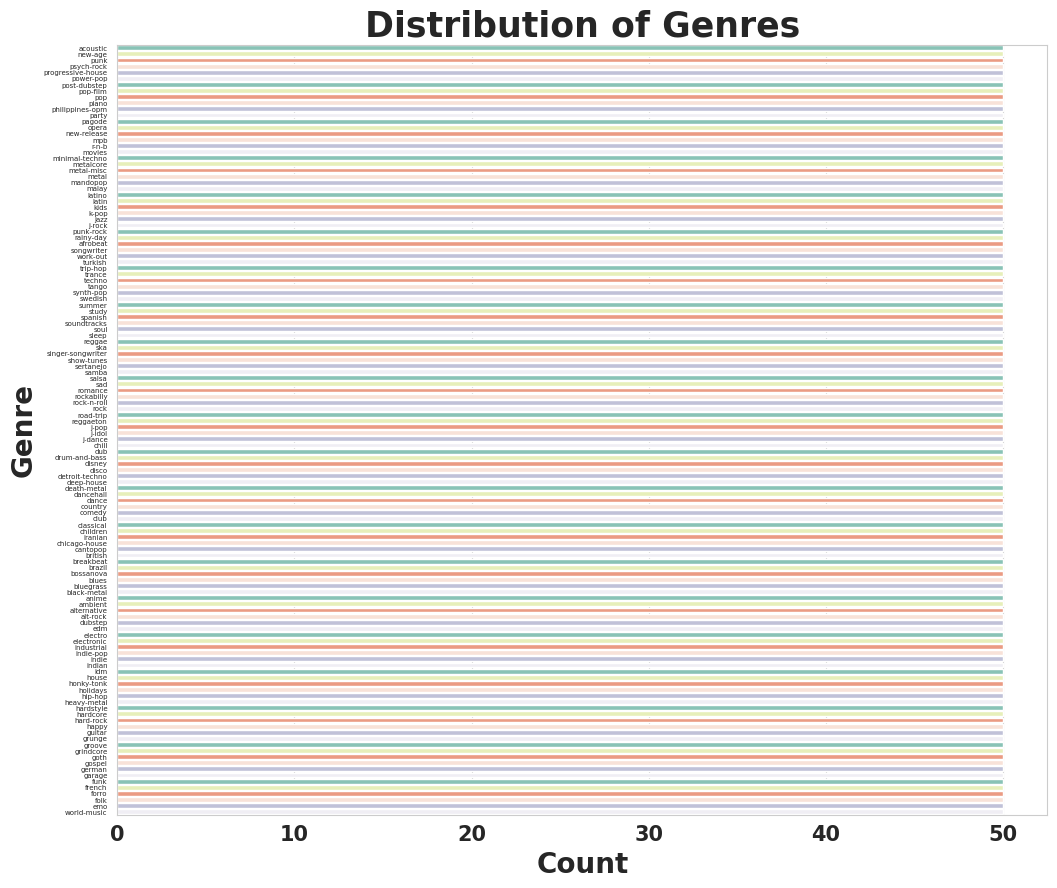

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette (HEX codes)
custom_palette = ["#7fcdbb", "#edf8b1", "#fc9272", "#fee0d2", "#bcbddc", "#efedf5"]

# Set the custom color palette
sns.set_palette(custom_palette)

# Plot the distribution of genres with adjusted figure size and label font size
plt.figure(figsize=(12, 10))  # Increased height for better visibility of y-axis labels
sns.countplot(y='genre', data=Spotify_df, palette=custom_palette[:] ,order=Spotify_df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Adjust font size of y-axis labels
plt.yticks(fontsize=5,fontweight='normal')

# Show the plot
plt.show()

plt.show()

##**This visualization examines the count of explicit and non-explicit tracks within each genre. It provides insights into the prevalence of explicit content across different genres.**

**2. What is the popularity of tracks?**

In [56]:
Spotify_df['popularity'].value_counts(normalize=True)*100

popularity
0     7.460317
24    2.269841
22    2.158730
18    2.095238
19    2.079365
        ...   
83    0.031746
85    0.031746
90    0.015873
84    0.015873
88    0.015873
Name: proportion, Length: 90, dtype: float64

<ipython-input-53-24dbb33bfe55>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(Spotify_df['popularity'], bins=30, kde=True, palette=any)


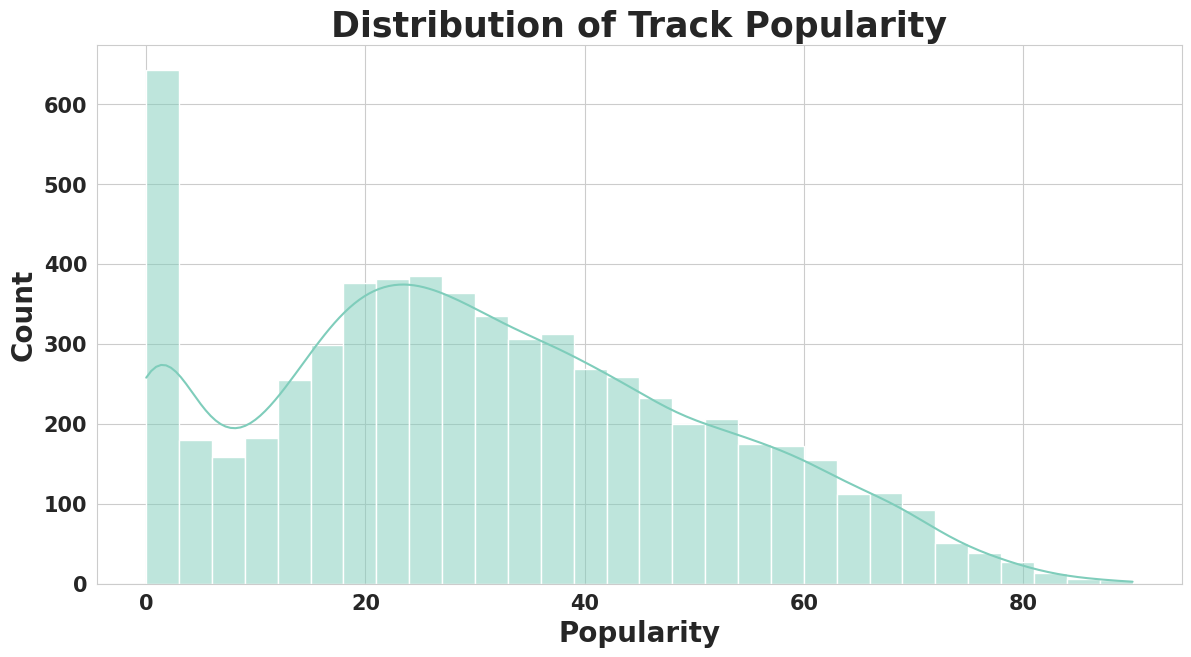

In [53]:
# Plot distribution of track popularity
plt.figure(figsize=(14, 7))
sns.histplot(Spotify_df['popularity'], bins=30, kde=True, palette=any)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

**This visualization would show the distribution of track popularity scores.**


##**3. Calculate the distribution of track duration.**


In [57]:
Spotify_df['duration_min'].value_counts(normalize=True)*100

duration_min
2.000000    0.222222
3.239017    0.174603
3.087000    0.158730
3.200000    0.142857
2.400000    0.126984
              ...   
1.205333    0.015873
2.700717    0.015873
1.628567    0.015873
2.526900    0.015873
2.363333    0.015873
Name: proportion, Length: 5566, dtype: float64

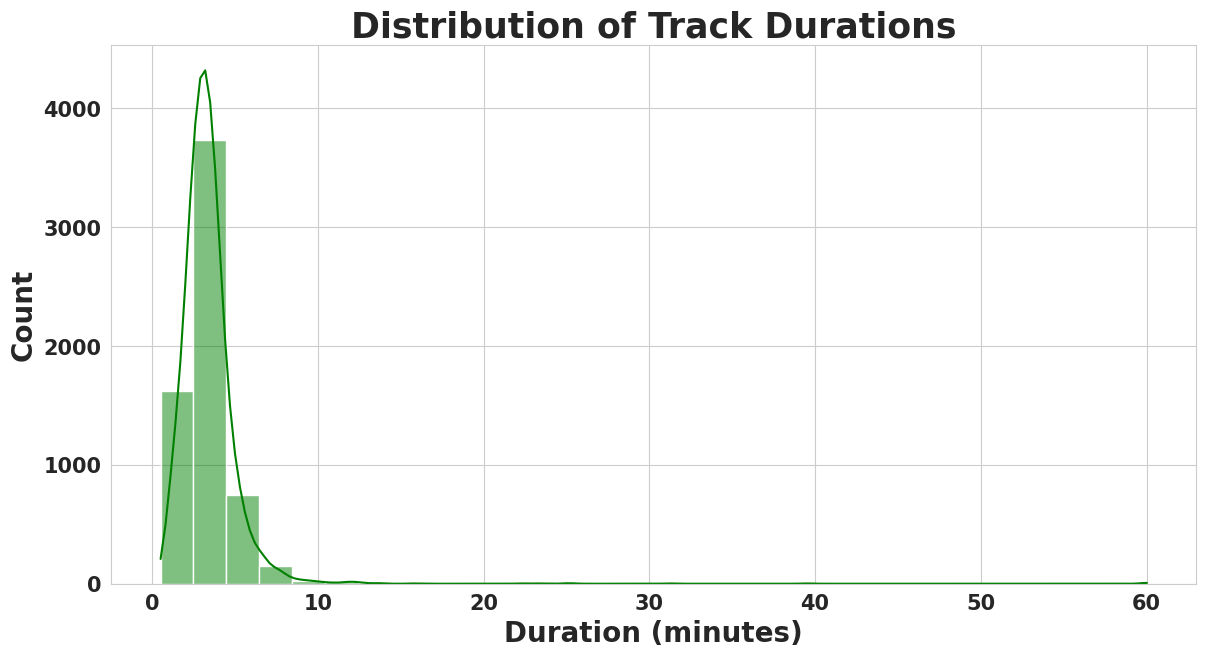

In [58]:
# Plot distribution of track durations
plt.figure(figsize=(14, 7))
sns.histplot(Spotify_df['duration_min'], bins=30, kde=True, color='green')
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

This visualization would show the distribution of track durations in minutes.


##**4. Calculate the count of explicit and non-explicit tracks for each genre?**

In [63]:
Spotify_df.groupby('explicit')['name'].count()

explicit
False    5106
True     1194
Name: name, dtype: int64

<ipython-input-60-b5c57333fe6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='explicit', data=Spotify_df, palette='Set1')


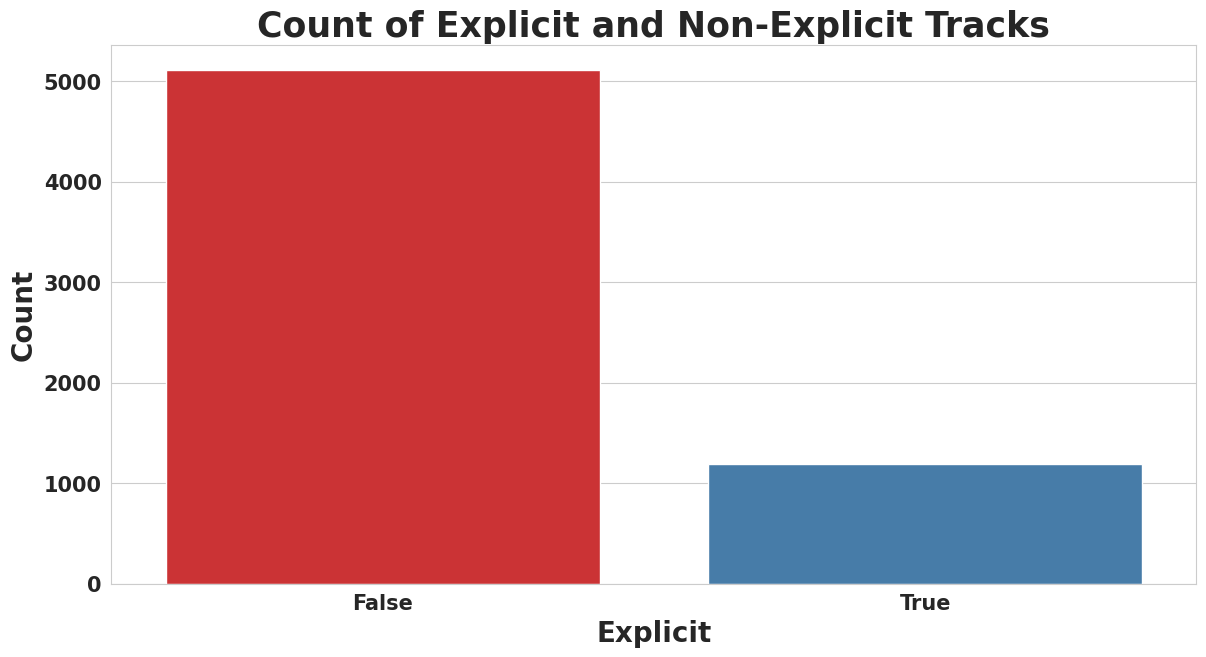

In [60]:
# Plot count of explicit and non-explicit tracks
plt.figure(figsize=(14, 7))
sns.countplot(x='explicit', data=Spotify_df, palette='Set1')
plt.title('Count of Explicit and Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

This visualization examines the count of explicit and non-exlicit tracks within each genre. It provides insights into the prevalence of explicit content across different genres.


##**5.Identify the top 10 artists with the most tracks.**

<ipython-input-64-fe9337251b77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='artist', x='track_count', data=top_artists, palette='viridis')


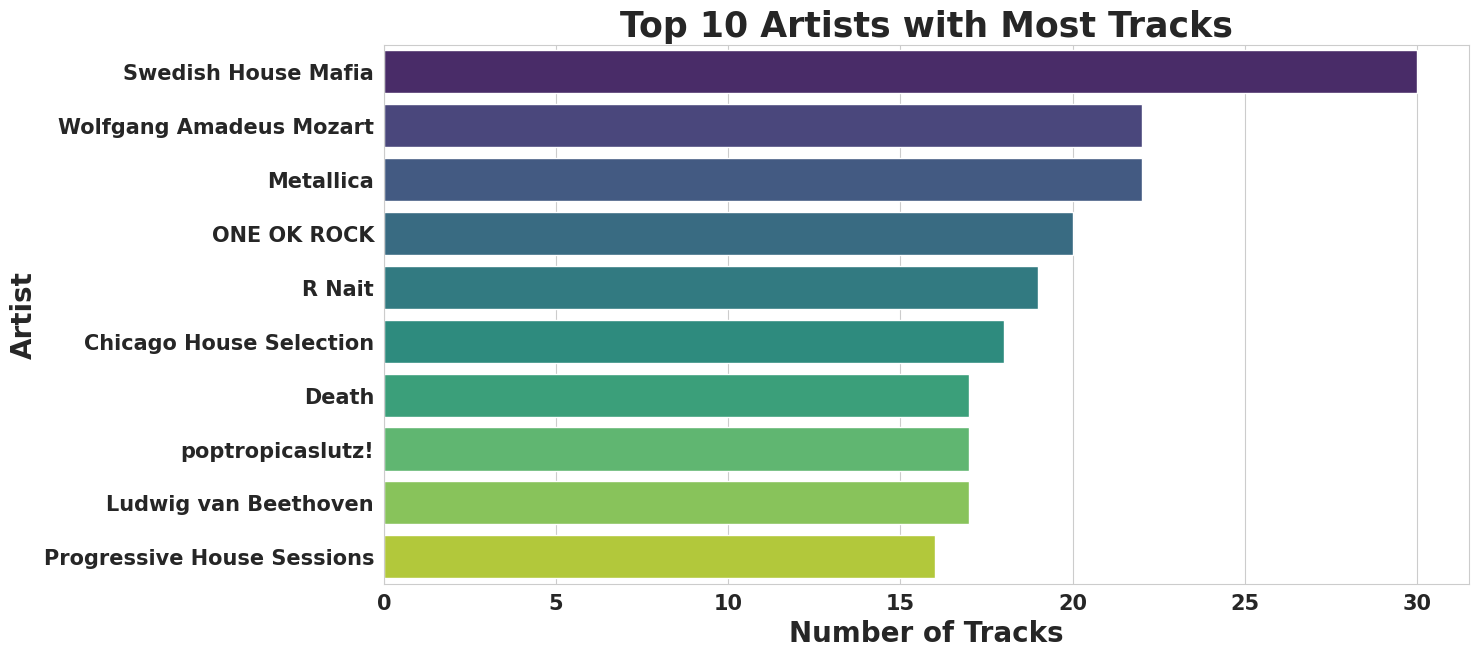

In [64]:
# Plot top 10 artists with the most tracks
plt.figure(figsize=(14, 7))
sns.barplot(y='artist', x='track_count', data=top_artists, palette='viridis')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

This visualization shows the number of tracks each of the top 10 artists have in the dataset. It helps identify the most prolific artists in the dataset.


**Bivariate Data Analysis** :

Bivariate analysis involves examining the relationship between two variables to understand how one variable influences or is related to another.

**1. Calculate the average popularity and average duration for each genre.**


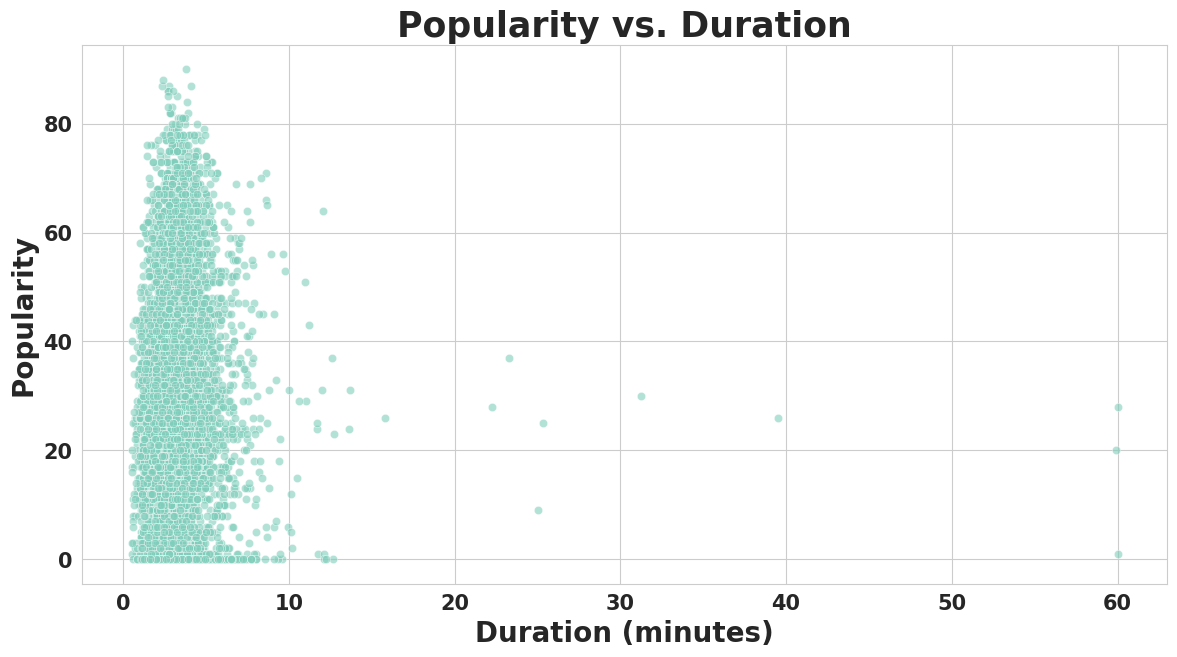

In [71]:
# Plot popularity vs. duration
plt.figure(figsize=(14, 7))
sns.scatterplot(x='duration_min', y='popularity', data=Spotify_df, alpha=0.6)
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()

This visualization compares the average popularity and average duration of tracks across different genres. It provides insights into how these two variables vary together within each genre.



**2. Which are the top genre by popularity?**

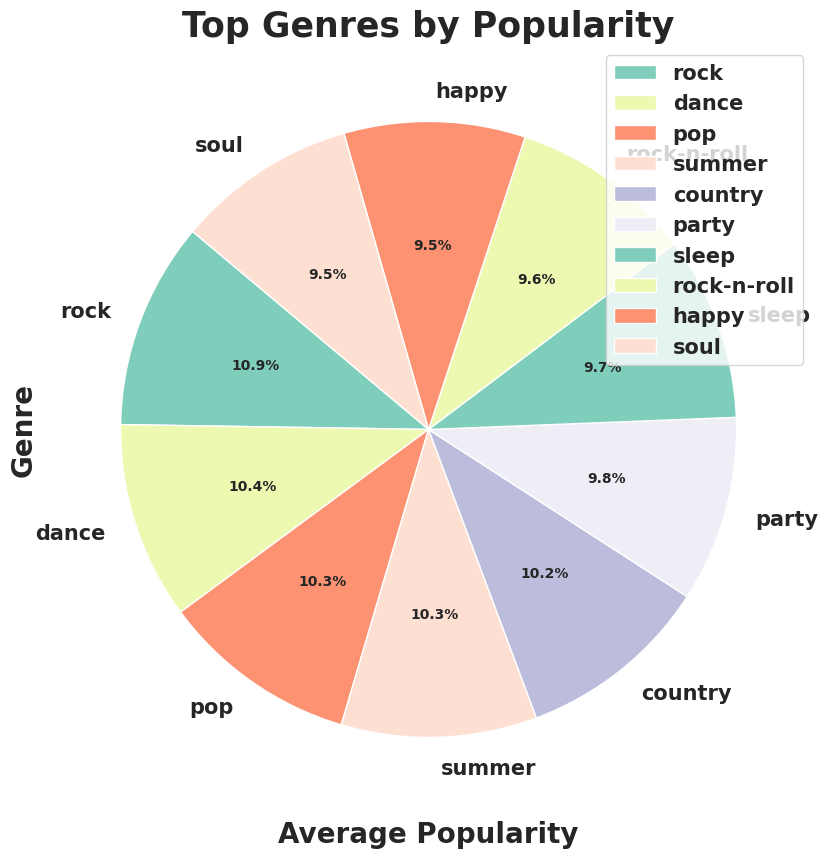

In [85]:
# Plot top genres by popularity
top_genres_by_popularity = avg_popularity_duration_genre.sort_values(by='avg_popularity', ascending=False).head(10)

plt.figure(figsize=(10,10))
plt.pie(top_genres_by_popularity['avg_popularity'], labels=top_genres_by_popularity['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Top Genres by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.legend(loc='upper right')
plt.show()

This visualization would show the average popularity of tracks within each genre.

3. Calculate the count of explicit content by genre.

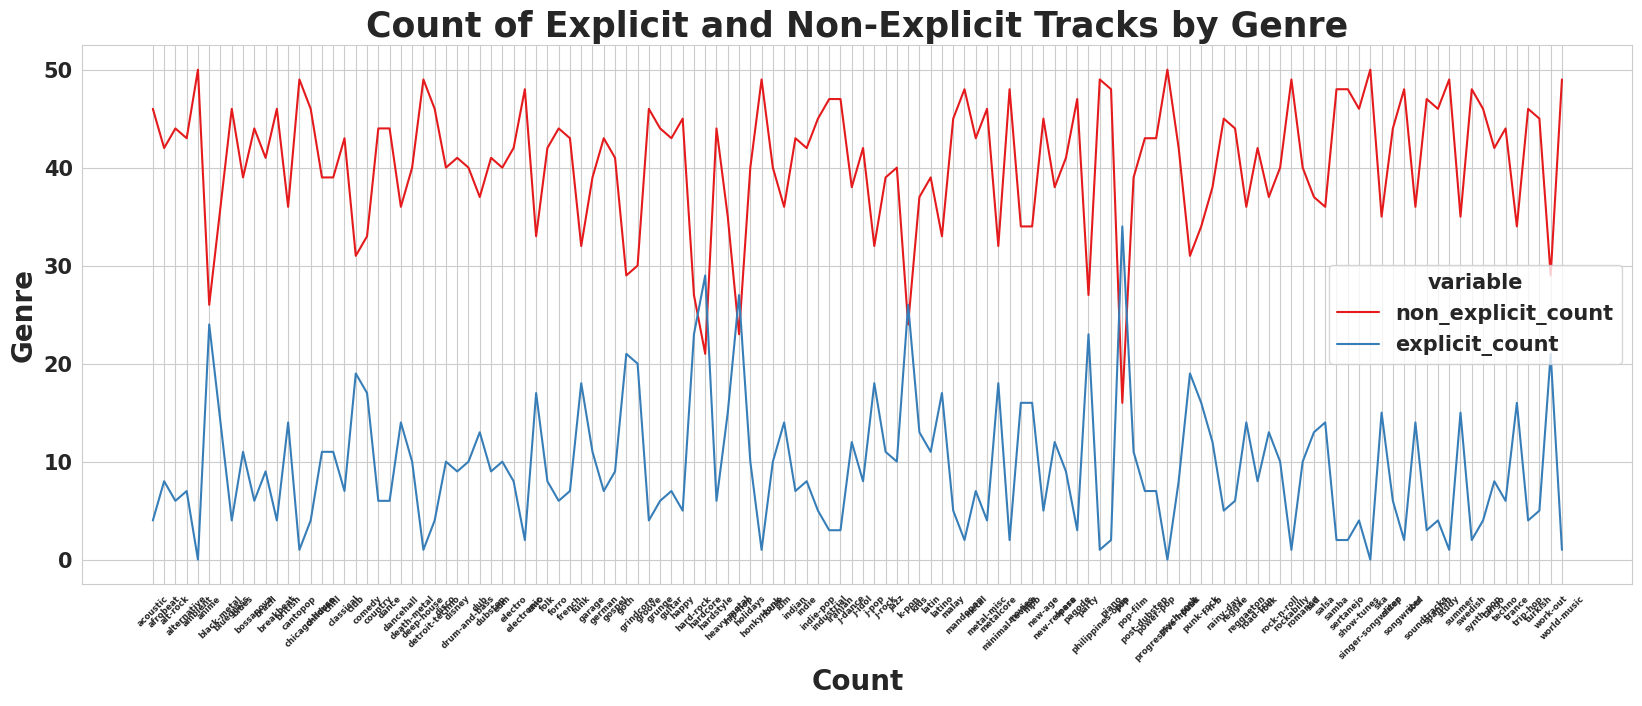

In [93]:
# Plot count of explicit and non-explicit tracks by genre
explicit_count_genre_melted = explicit_count_genre.melt(id_vars='genre', value_vars=['non_explicit_count', 'explicit_count'])

plt.figure(figsize=(20, 7))
sns.lineplot(x='genre', y='value', hue='variable', data=explicit_count_genre_melted, palette='Set1')
plt.title('Count of Explicit and Non-Explicit Tracks by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=45,fontsize=6)
plt.show()


This visualization would show the count of explicit and non-explicit tracks for each genre.


4. What is the average popularity by genre?

<ipython-input-107-3c5fd0e87759>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_popularity', y='genre', data=avg_popularity_duration_genre,palette="Set2") # Capture the axes object here


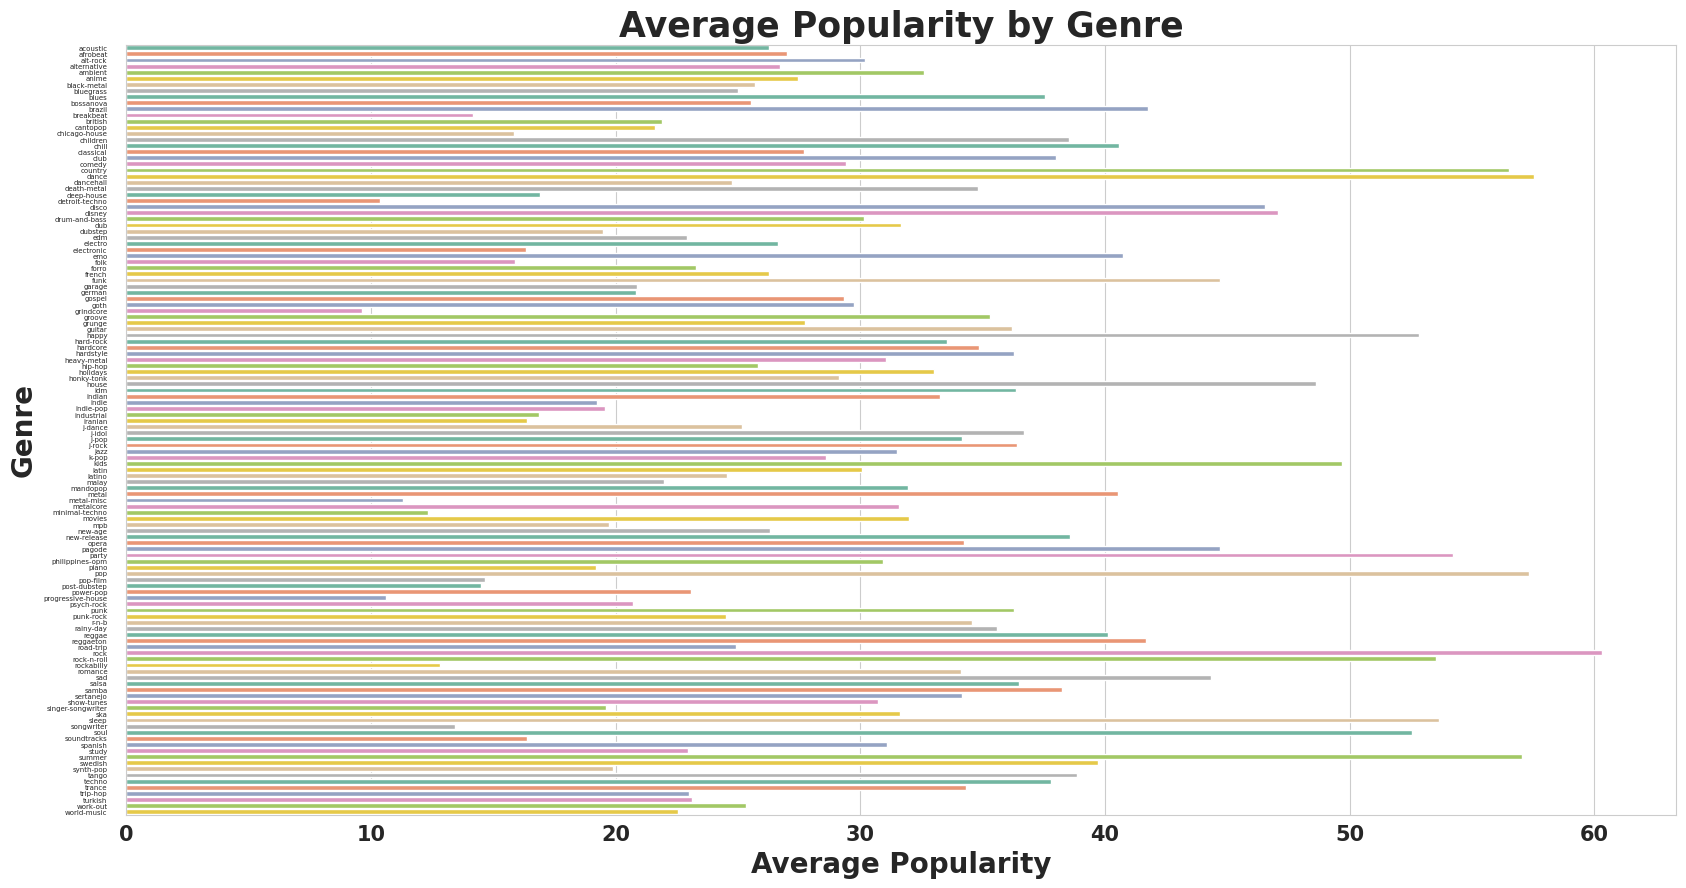

In [107]:
# Plot average popularity by genre
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='avg_popularity', y='genre', data=avg_popularity_duration_genre,palette="Set2") # Capture the axes object here
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.yticks(fontsize=5,fontweight='normal')
ax.yaxis.set_tick_params(pad=10)
plt.show()

This visualization would show the average popularity for each genre.


5. Calculate average popularity and duration by genre.

<ipython-input-113-abdbe5c29c87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='avg_popularity', y='genre', data=avg_popularity_duration_genre, palette='Blues', label='Avg Popularity')
<ipython-input-113-abdbe5c29c87>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_duration_min', y='genre', data=avg_popularity_duration_genre, palette='Reds', ax=ax2, label='Avg Duration (min)')


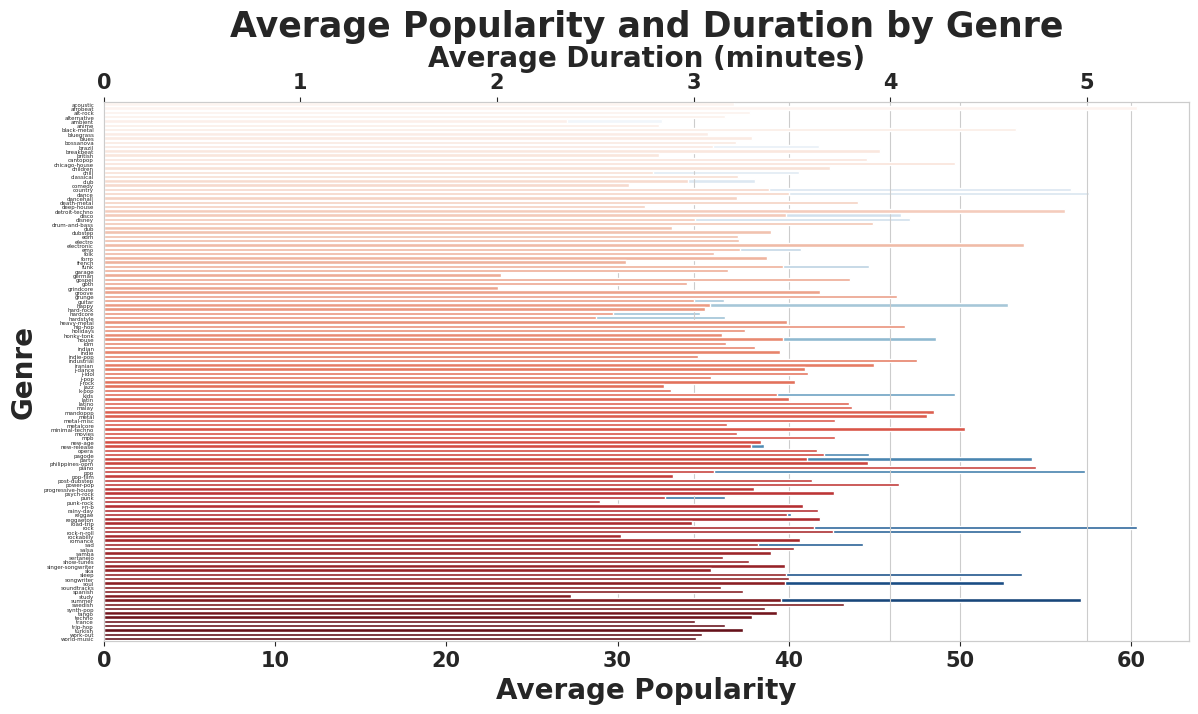

In [113]:
# Plot average popularity and duration by genre
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average popularity
ax1 = sns.barplot(x='avg_popularity', y='genre', data=avg_popularity_duration_genre, palette='Blues', label='Avg Popularity')
ax1.set_xlabel('Average Popularity')
ax1.set_ylabel('Genre')
ax1.set_title('Average Popularity and Duration by Genre')
plt.yticks(fontsize=4,fontweight='normal')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twiny()

# Plot average duration
sns.barplot(x='avg_duration_min', y='genre', data=avg_popularity_duration_genre, palette='Reds', ax=ax2, label='Avg Duration (min)')
ax2.set_xlabel('Average Duration (minutes)')
plt.show()


6. Correlation heatmap visualization code

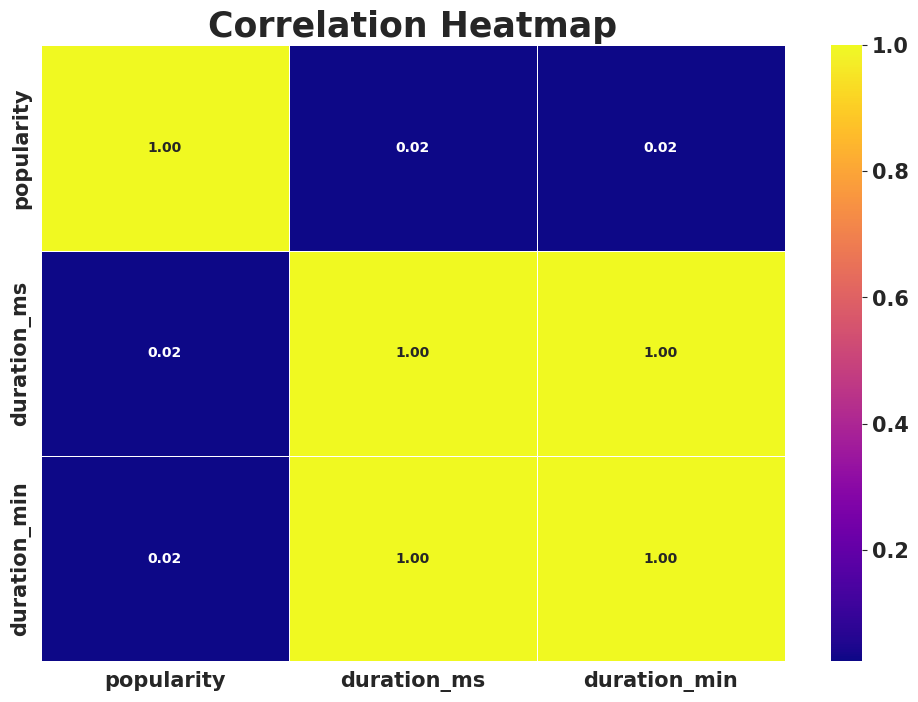

In [116]:
# Select numerical columns for correlation
numerical_columns = Spotify_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = Spotify_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##**What do you suggest the client to achieve Business Objective ?**

1. Enhanced Content Personalization:

 Improved algorithms for personalized recommendations, leading to higher user satisfaction and retention.

2. Increased User Engagement:

 More time spent on the platform and higher user interaction rates due to better-aligned content offerings.

3. Targeted Marketing Campaigns:

 Effective marketing strategies that attract new users and encourage existing users to explore more content.

4. Informed Content Acquisition:

 Strategic decisions on content acquisition based on data-driven insights, ensuring a relevant and appealing music library.

5. Balanced Content Distribution:

 A well-managed balance between explicit and non-explicit content, catering to a wider audience while maintaining compliance with regulations.

By achieving these outcomes, Spotify can strengthen its competitive position in the music streaming market, drive growth, and ensure long-term user loyalty.

#**Conclusion**

1. Genre Distribution:

 The dataset contains a diverse range of genres, with some genres appearing more frequently than others. This could indicate the popularity of certain genres within the dataset.

2. Track Popularity:

 The popularity of tracks follows a roughly normal distribution, with most tracks having a popularity score in the middle range. This suggests that there are few extremely popular or unpopular tracks.

3. Track Duration:

 Track durations are spread across a wide range, but the majority of tracks have a duration between 100 and 300 seconds (approximately 1.5 to 5 minutes). This is typical for music tracks, as they usually fall within this duration range.

4. Explicit Content:

 There are significantly fewer explicit tracks compared to non-explicit ones. This could imply that most tracks in this dataset are suitable for a general audience.

5. Top Artists and Genres:

 Certain artists and genres dominate in terms of the number of tracks and total popularity, providing insights into popular music trends.


#**Recommendations :**

1. For music streaming services:

 Focus on promoting genres that are underrepresented but show potential growth in popularity.

2. For artists and producers:

 Aim to create tracks within the popular duration range to align with listener preferences.

3. For content regulators:

 Maintain strict guidelines for explicit content to ensure the platform remains accessible to all age groups.